<a href="https://colab.research.google.com/github/ralsouza/machine_learning/blob/main/notebooks/01_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Business Problem
Our objective is to build a machine learning model to be able to predict the mean occupation rate of houses in Boston. To each house we have several explanatory variables. Therefore, we can solve this problem using `Linear Regresion Simple` or `Multiple`.

## Defining the Dataset
We'll use the `Boston Housing Dataset`, that is a dataset has the `mean occupation rate` of houses, with other 13 variables that can be related to houses price. These are the factors such as socioeconimics conditions, environment conditions, educational installations and other similar factors. There are 506 observations and 14 variables in the data. There are 12 numeric variables in our dataset and one categorical variable. The goal of this project is to build a linear regression model to estimate the `mean occupation rate` of the houses's owners in Boston.

Source: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

### Dataset Details
1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's


In [1]:
# Loading the Boston Houses dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Importing libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# 1. Exploratory Data Analysis

In [2]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset["target"] = boston.target

In [3]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Computing mean of target variable
mean_target_variable = dataset["target"].mean()
mean_target_variable

22.532806324110698

According of `Central Limit Theorm (CLT)`, when the size of the sample increases, the sampling distribuition gets closer of a normal distribuition. In other words, when most of values are close to the mean. 

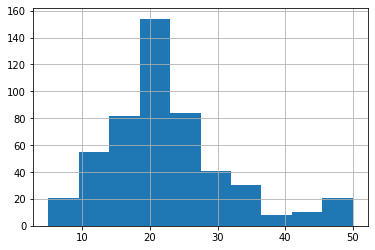

In [5]:
dataset["target"].hist(bins=10)
plt.show()

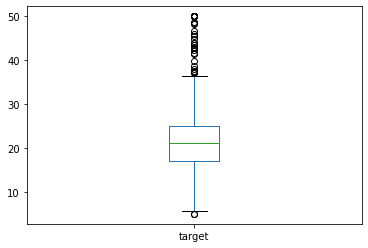

In [6]:
dataset["target"].plot(kind="box")
plt.show()

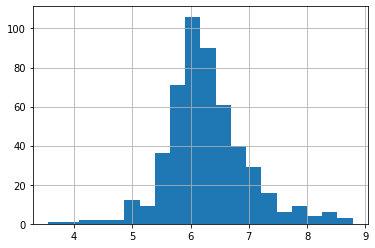

In [7]:
dataset["RM"].hist(bins=20)
plt.show()

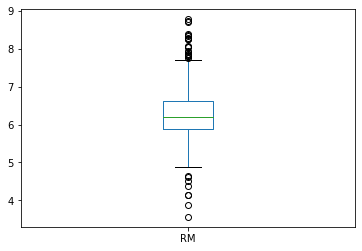

In [63]:
dataset["RM"].plot(kind="box")
plt.show()

For the simple linear regression, we will use as explanatory variable the `RM`variable that represents the average number of rooms per dwelling.

In [8]:
# Computing the Standard Deviation of RM
rm_std = np.std(dataset["RM"])

print(f"Standard Deviation of RM: {rm_std:.5f}")

Standard Deviation of RM: 0.70192


In [10]:
# Pearson function from scipy, that represents the correlation between variables
from scipy.stats.stats import pearsonr

rm_personr = pearsonr(dataset["RM"], dataset["target"])[0]

print(f"The Pearson's correlation between RM and Target: {rm_personr:.5f}") 

The Pearson's correlation between RM and Target: 0.69536


In [11]:
# Computing the range of x and y values
x_range = [dataset["RM"].min(), dataset["RM"].max()]
y_range = [dataset["target"].min(), dataset["target"].max()]

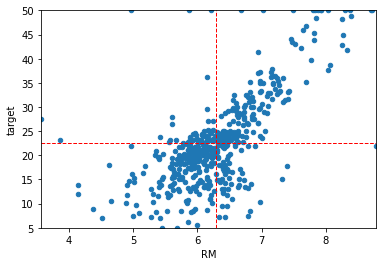

In [12]:
# Plot of x and y values with the avarege
scatter_plot = dataset.plot(kind = "scatter", x = "RM", y = "target", xlim = x_range, ylim = y_range)

# Compute the average
mean_y = scatter_plot.plot(x_range, [dataset["target"].mean(),dataset["target"].mean()], "--", color = "red", linewidth = 1)
mean_X = scatter_plot.plot([dataset["RM"].mean(), dataset["RM"].mean()], y_range, "--", color = "red", linewidth = 1)

# Linear Regression with StatsModels
[www.statsmodels.org](https://www.statsmodels.org/stable/index.html)

[Why Uppercase for X and Lowercase for y is Used in Python Model](https://www.freetechtrainer.com/why-uppercase-for-x-and-lowercase-for-y-is-used-in-python-model/)

In [13]:
# Importing the function.
import statsmodels.api as sm

In [14]:
# Defining the X and y. Let's add a constant to X value.
y = dataset["target"]
x = dataset["RM"]

In [16]:
# This command adds a constant values in X variable, generating a matrix,  
# the bias will be computed internally by the function.
# This standard is demanded by StatsModels framework.
X = sm.add_constant(x)
X.head(5)

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [18]:
# Building the model with OLS (Ordinary List Squares)
model = sm.OLS(y,X)

# Training the model
model_v1 = model.fit()

In [19]:
print(model_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 15 May 2021   Prob (F-statistic):           2.49e-74
Time:                        23:44:17   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [20]:
# Printing the parameters
print(model_v1.params)

const   -34.670621
RM        9.102109
dtype: float64


In [21]:
# Generating the predicted values
predicted_values = model_v1.predict(X)
predicted_values.head(10)

0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
5    23.855940
6    20.051258
7    21.507596
8    16.583355
9    19.978442
dtype: float64

In [27]:
# Making the predictions with the trained model

# Defining a RM to predict the value
RM = 5

# Defining the array with the StatsModels constant
Xp = np.array([1,RM])

# Predict the occupation value based on the new RM value
new_rm_predict = model_v1.predict(Xp)

print(f"If RM value is {RM}, our model will predict the average occupation rate as {new_rm_predict}")

If RM value is 5, our model will predict the average occupation rate as [10.83992413]
